<a href="https://colab.research.google.com/github/MarianaPires93/DL/blob/main/Deep%20Learning_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Neural Network:**

*   Importing libraries





In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow_datasets as tfds

*   Auxiliary Code




In [2]:
def plot_acuracy_loss(history):
    """
    Adapted from: https://www.tensorflow.org/tutorials/images/classification
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

*   Load **dataset** and information


In [3]:
tfds.load("malaria")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteXL9FY8/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


{Split('train'): <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [4]:
ds_info = tfds.load("malaria")
print(ds_info)

{'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}


In [5]:
builder = tfds.builder('malaria')
info = builder.info

info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

*   Data Preperation



In [6]:
# Load the malaria dataset
ds_train_full, ds_info = tfds.load('malaria', split='train', as_supervised=True, with_info=True)

# Define sample sizes
train_size = 7000
test_size = 1500
val_size = 1500

# Split the full dataset into train, test, and val splits
ds_train = ds_train_full.take(train_size)
ds_train_full = ds_train_full.skip(train_size)

ds_test = ds_train_full.take(test_size)
ds_train_full = ds_train_full.skip(test_size)

ds_val = ds_train_full.take(val_size)

# Print the lengths of the subsets
print("Length of training set:", len(list(ds_train)))
print("Length of test set:", len(list(ds_test)))
print("Length of validation set:", len(list(ds_val)))


Length of training set: 7000
Length of test set: 1500
Length of validation set: 1500


*   Show examples



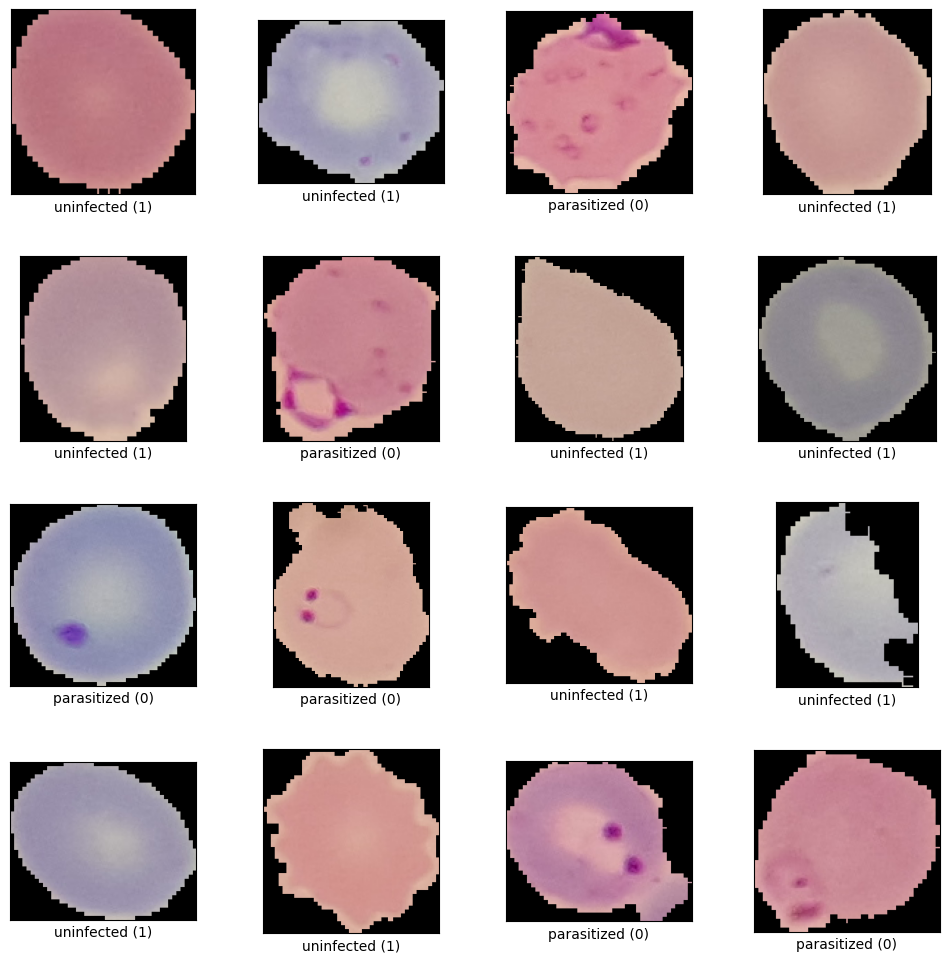

In [7]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

*   Normalize Data



In [8]:
def normalize_image(image, label):
    return tf.cast(image, tf.float32) /255.0, label

In [9]:
normalize_ds_train = ds_train.map(normalize_image)
normalize_ds_test = ds_test.map(normalize_image)
normalize_ds_val = ds_val.map(normalize_image)

*  Resize Images





In [10]:
def resize_image(image, label, target_height=200, target_width=200):
    return tf.image.resize_with_pad(image, target_height, target_width), label

In [11]:
resized_ds_train = normalize_ds_train.map(resize_image)
resized_ds_test = normalize_ds_test.map(resize_image)
resized_ds_val = normalize_ds_val.map(resize_image)

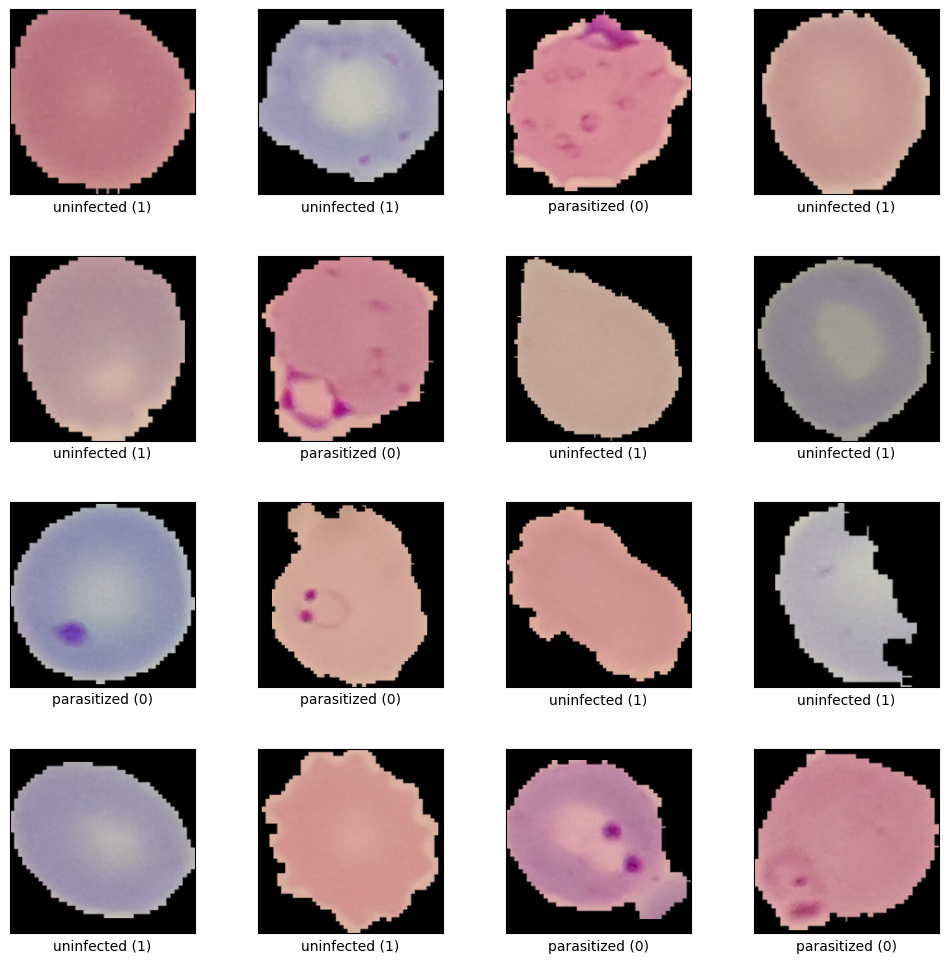

In [12]:
fig2 = tfds.show_examples(resized_ds_train, ds_info, rows=4, cols=4) #Show resized

In [13]:
resized_ds_train = resized_ds_train.batch(256)
resized_ds_test = resized_ds_test.batch(256)
resized_ds_val = resized_ds_val.batch(256)

# **Model**

In [14]:
kernel_regularizer = tf.keras.regularizers.L2(0.01) #Prevent overfitting in machine learning models if needed

In [21]:
net_model = Sequential([
    layers.Input(shape=(200, 200, 3)),  # Specify input shape
    layers.Conv2D(16, (6,6), activation='relu'),
    layers.MaxPooling2D(),  #Max Pooling Layer: Max-pooling layer to reduce spatial dimensions while retaining important information

    layers.Conv2D(16, (6,6), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(), #Flattens the output from the previous layer into a 1D array, preparing it to be input into a dense layer
    layers.Dense(128, activation='relu'), #dense layers can only receive 1D information
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
net_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [23]:
net_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 195, 195, 16)      1744      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 97, 97, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 92, 16)        9232      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 46, 46, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 22, 22, 32)       

*  Training Model



In [24]:
epochs=10
history = net_model.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


28/28 [==============================] - 21s 618ms/step - loss: 0.6862 - accuracy: 0.5530 - val_loss: 0.6827 - val_accuracy: 0.5193
Epoch 2/10
28/28 [==============================] - 13s 477ms/step - loss: 0.6428 - accuracy: 0.6456 - val_loss: 0.5836 - val_accuracy: 0.7013
Epoch 3/10
28/28 [==============================] - 13s 469ms/step - loss: 0.5072 - accuracy: 0.7641 - val_loss: 0.3758 - val_accuracy: 0.8813
Epoch 4/10
28/28 [==============================] - 13s 480ms/step - loss: 0.2969 - accuracy: 0.8919 - val_loss: 0.2801 - val_accuracy: 0.8920
Epoch 5/10
28/28 [==============================] - 18s 632ms/step - loss: 0.2568 - accuracy: 0.9141 - val_loss: 0.2405 - val_accuracy: 0.9240
Epoch 6/10
28/28 [==============================] - 13s 473ms/step - loss: 0.2111 - accuracy: 0.9301 - val_loss: 0.2016 - val_accuracy: 0.9213
Epoch 7/10
28/28 [==============================] - 14s 510ms/step - loss: 0.1822 - accuracy: 0.9359 - val_loss: 0.1946 - val_accuracy: 0.9393
Epoch 8/10

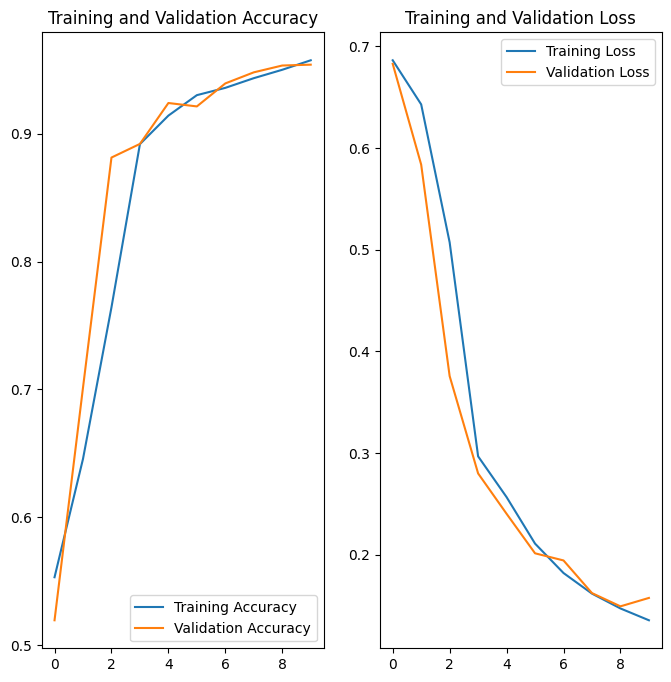

In [25]:
plot_acuracy_loss(history)

*   Testing Model





In [26]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = net_model.evaluate(resized_ds_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 [==============================] - 5s 211ms/step - loss: 0.1832 - accuracy: 0.9473
Test Loss: 0.18323364853858948
Test Accuracy: 0.9473333358764648


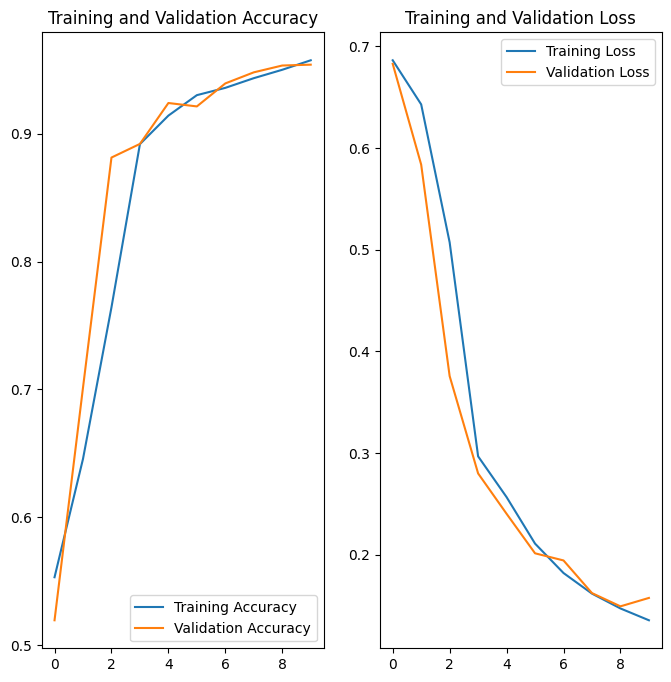

In [27]:
plot_acuracy_loss(history)

*   **Prediction**


In [28]:
predictions = net_model.predict(resized_ds_test)

6/6 [==============================] - 8s 227ms/step


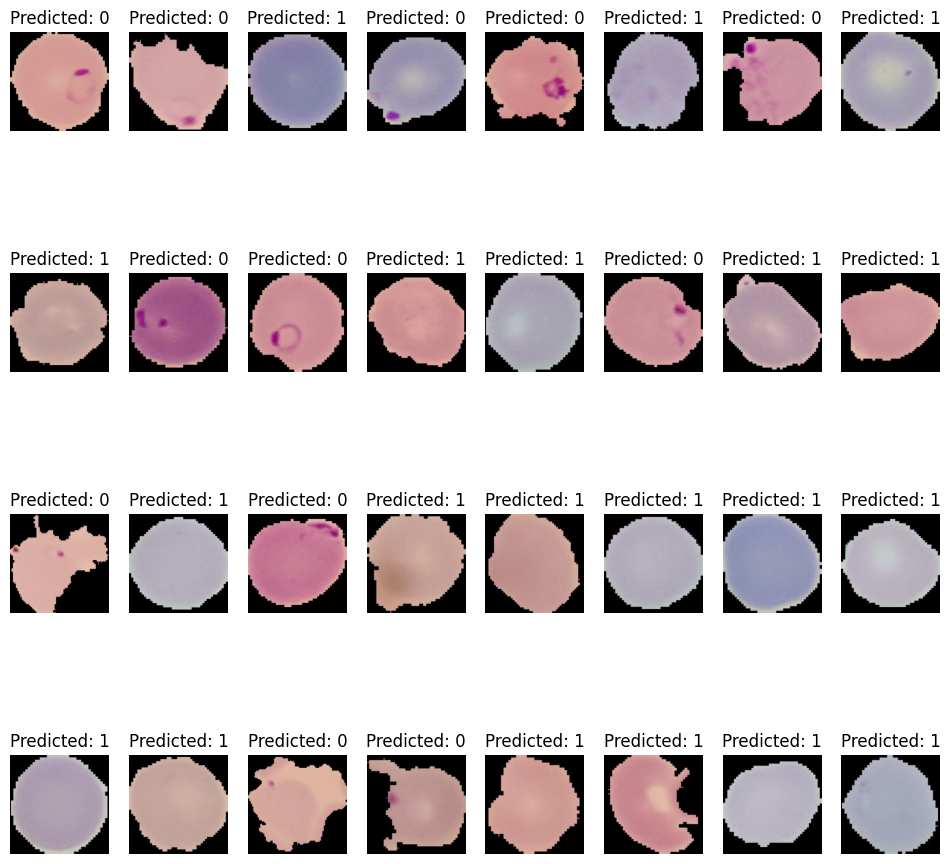

In [31]:
# Visualize predictions with images
plt.figure(figsize=(12, 12))
for images, labels in resized_ds_test.take(1):  # Take a batch of images and labels
    for i in range(32):  # Display 16 images
        ax = plt.subplot(4, 8, i + 1) # Adjust the subplot layout as needed
        plt.imshow(images[i])
        plt.title('Predicted: {:.0f}'.format(predictions[i][0]))
        plt.axis('off')
plt.show()